 <h5 align="center">Metody Obliczeniowe w Nauce i Technice </h5>
<h6 align="center">Labolatorium 3</h6>
 <h6 align="center"> Singular Value Decomposition</h6>

In [5]:
import math
import random
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

<b>Zadanie 1 Przekształcanie sfery w elipsoidę</b> <br>
<hr><b>1.1</b> Kożystając z równania parametrycznego rysujemy sferę jednostokwą w 3D

\begin{equation*} v = \begin{bmatrix}
cos(s)sin(t)\\ 
sin(s)sin(t)\\ 
cos(t)
\end{bmatrix}
\end{equation*}

\begin{equation*}
s\in [0,2\pi], t \in [0,\pi]
\end{equation*}

In [6]:
# showing 3d plot
def show_3d_plot(X,Y,Z,label):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X, Y, Z, c='b', marker='o',s=1)

    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([np.amax(X)-np.amin(X), np.amax(Y)-np.amin(Y), np.amax(Z)-np.amin(Z)]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(np.amax(X)+np.amin(X))
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(np.amax(Y)+np.amin(Y))
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(np.amax(Z)+np.amin(Z))
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    fig.suptitle(label)
    plt.grid()
    plt.show()

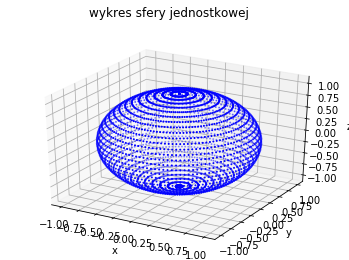

In [7]:
T = np.arange(0,math.pi,0.1)
S = np.arange(0,2*math.pi,0.05)

X = []
Y = []
Z = []
for i,t in enumerate(T):
    for j,s in enumerate(S):
        X.append(math.sin(t)*math.cos(s))
        Y.append(math.sin(s)*math.sin(t))
        Z.append(math.cos(t))

show_3d_plot(X,Y,Z,'wykres sfery jednostkowej')
sphere_matrix = [list(a) for a in zip(X, Y, Z)]

<hr><b>1.2</b> Generujemy 3 różne macierze A1,A2,A3, (Ai ∈ R3×3), za ich pomocą dokonujemy przekształcenia sfery w elipsoidę, a następnie przedstawiamy wizualizację uzyskanego wyniku

In [8]:
def show_3d_plot_matrix(matrix,axis,label):
    X=[val[0] for val in matrix]
    Y=[val[1] for val in matrix]
    Z=[val[2] for val in matrix]
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.scatter(X, Y, Z, c='b', marker='o',s=1)

    a_x=[val[0] for val in axis]
    a_y=[val[1] for val in axis]
    a_z=[val[2] for val in axis]

    ax.scatter(a_x, a_y, a_z, c='r', marker='o',s=1)

    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([np.amax(X)-np.amin(X), np.amax(Y)-np.amin(Y), np.amax(Z)-np.amin(Z)]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(np.amax(X)+np.amin(X))
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(np.amax(Y)+np.amin(Y))
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(np.amax(Z)+np.amin(Z))
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    fig.suptitle(label)
    plt.grid()
    plt.show()

In [9]:
A1 =  np.array([[2,3,1],[1,1,3],[4,0,1]])
A2 =  np.array([[1,2,1],[0,2,0],[0,2,1]])
A3 =  np.array([[1,0,0.5],[0,1.5,0],[0,0,0.5]])

A = [A1,A2,A3]
ax_x = [[a,0,0] for a in np.arange(-4,4,0.1)]
ax_y = [[0,a,0] for a in np.arange(-4,4,0.1)]
ax_z = [[0,0,a] for a in np.arange(-4,4,0.1)]

elipse_1 = np.matmul(sphere_matrix,A1)
elipse_2 = np.matmul(sphere_matrix,A2)
elipse_3 = np.matmul(sphere_matrix,A3)

E = [elipse_1,elipse_2,elipse_3]

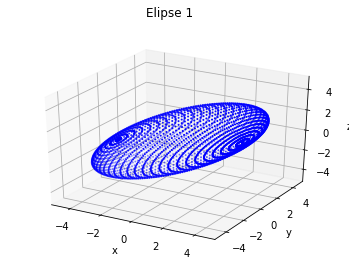

In [10]:
show_3d_plot_matrix(elipse_1,[],"Elipse 1")

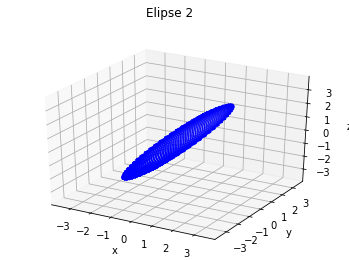

In [11]:
show_3d_plot_matrix(elipse_2,[],"Elipse 2")

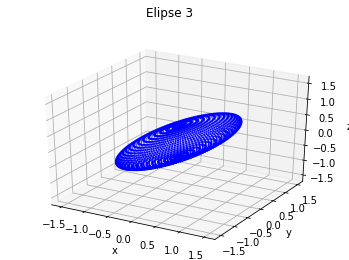

In [12]:
show_3d_plot_matrix(elipse_3,[],"Elipse 3")

<hr><b>1.3</b> Dokonuejmy rozkładu według wartości osobliwych (SVD) każdej macierzy Ai. Na wykresie elipsoidy odpowiadającej przekształceniu Ai dodajemy wizualizację jej półosi wyznaczonych za pomocą SVD.

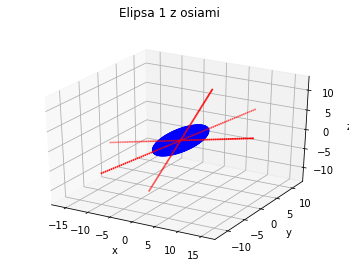

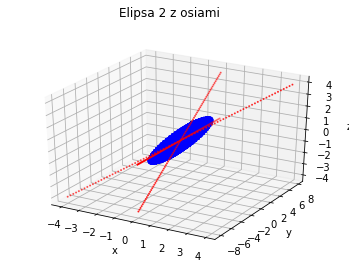

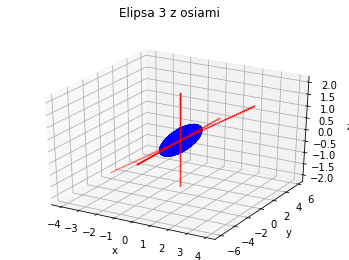

In [17]:
for (i,a) in enumerate(A):
    ax_x = [[a,0,0] for a in np.arange(-4,4,0.1)]
    ax_y = [[0,a,0] for a in np.arange(-4,4,0.1)]
    ax_z = [[0,0,a] for a in np.arange(-4,4,0.1)]

    axis = [ax_x,ax_y,ax_z]
    out = []
    u, s, vh = np.linalg.svd(a)
    u.shape, s.shape, vh.shape
    for os in axis:
        m1 = list(np.matmul(os,np.dot(u * s, vh)))
        out.append(m1)

    show_3d_plot_matrix(list(E[i]),out[0]+out[1]+out[2],'Elipsa '+str(i+1)+' z osiami')

<hr><b>1.4</b> Zanjdujemy taką macierz Ai, aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Ryusjemy odpowiadającą jej elipsoidę.

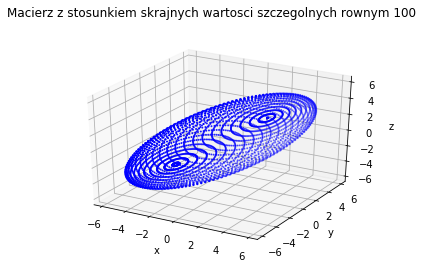

In [18]:
s = [1,1]
while max(s)/min(s) < 100:
    random_matrix = []
    for a in range(3):
        random_matrix.append([])
        for b in range(3):
            random_matrix[a].append(random.randint(0,5))
    u, s, vh = np.linalg.svd(random_matrix)
    u.shape, s.shape, vh.shape


elipse_4 = list(np.matmul(sphere_matrix,random_matrix))
show_3d_plot_matrix(elipse_4,[],"Macierz z stosunkiem skrajnych wartosci szczegolnych rownym 100")

<hr><b>1.5</b> Dla wybranej macierzy Ai przestawiamy wizualizacje SViT, SΣiViT oraz SUiΣiViT, gdzie Ai = UiΣiViT, a S oznacza sferę z punktu 1

In [19]:
A1 =  np.array([[2,3,1],[1,1,3],[4,0,1]])
u, s, vh = np.linalg.svd(A1)
u.shape, s.shape, vh.shape
sigma = np.diag(s)

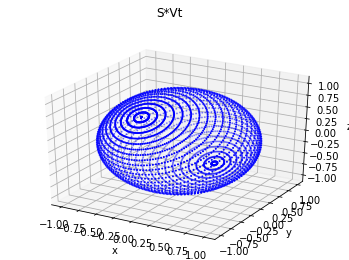

In [20]:
elipse_5 = np.dot(sphere_matrix,vh)
show_3d_plot_matrix(elipse_5,[],"S*Vt")

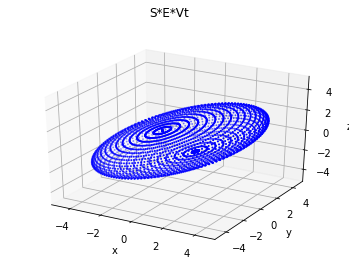

In [21]:
elipse_6 = np.dot(sphere_matrix,np.dot(sigma,vh))
show_3d_plot_matrix(elipse_6,[],"S*E*Vt")

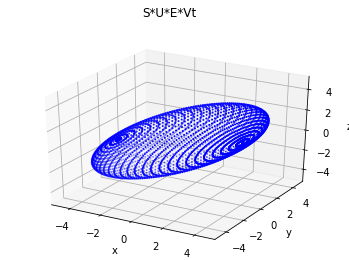

In [22]:
elipse_7 = np.dot(sphere_matrix,np.dot(u,np.dot(sigma,vh)))
show_3d_plot_matrix(elipse_7,[],"S*U*E*Vt")

Jak widać S*U*Vt jest taka sama jak Elipsa 1, co oznacza ze wymnozenie trzech macierzy z SVD jest rownoważne orginalnej maceirzy.

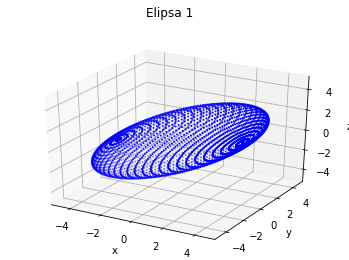

In [23]:
show_3d_plot_matrix(elipse_1,[],"Elipsa 1")

<b>Zadanie 2 Kompresja obrazu</b> <br>
<hr><b>2.1</b> Przygotowywujemy przykładowe zdjęcie o rozmiarze 512×512 pikseli 

<img src="lenna.png">

<hr><b>2.2</b> Obliczamy SVD macierzy pikseli I, a następnie dokonujemy przybliżenia tej macierzy za pomocą low rank approximation (k pierwszych wartości osobliwych) uzyskując kompresję obrazu wejściowego.

\begin{equation*}I \simeq \sum_{k}^{i=1} \delta_{i}u_{i}v_{i}^{T}\end{equation*}

gdzie σi jest i-tąwartościąosobliwąmacierzyI,ui jestlewymwektoremosobliwym, a vi - prawym wektorem osobliwym.

In [37]:
import numpy as np
from scipy import linalg
import imageio
from PIL import Image

In [38]:
def low_rank_approximation(k):
    image = Image.open("lenna.png")
    image = np.array(image)

    r_u,r_s,r_vh = np.linalg.svd(image[:,:,0])
    g_u,g_s,g_vh = np.linalg.svd(image[:,:,1])
    b_u,b_s,b_vh = np.linalg.svd(image[:,:,2])

    r_u = np.matrix(r_u[:,:k])
    g_u = np.matrix(g_u[:,:k])
    b_u = np.matrix(b_u[:,:k])

    r_s = np.diag(r_s[:k])
    g_s = np.diag(g_s[:k])
    b_s = np.diag(b_s[:k])

    r_vh = np.matrix(r_vh[:k,:])
    g_vh = np.matrix(g_vh[:k,:])
    b_vh = np.matrix(b_vh[:k,:])

    matrix_r = r_u * r_s * r_vh
    matrix_g = g_u * g_s * g_vh
    matrix_b = b_u * b_s * b_vh

    new_image = np.zeros((512,512,3), 'uint8')
    new_image[...,0] = matrix_r
    new_image[...,1] = matrix_g
    new_image[...,2] = matrix_b
    out_image = Image.fromarray(new_image)
    out_image.save("lenna_"+str(k)+".png")

 <hr><b>2.3</b> Porównuejmy obraz wynikowy z obrazem źródłowym dla różnych wartości k (np. przedstawiając różnicę pomiędzy nimi).

In [26]:
low_rank_approximation(1)

<img src="lenna_1.png">

In [27]:
low_rank_approximation(2)

<img src="lenna_2.png">

In [28]:
low_rank_approximation(4)

<img src="lenna_4.png">

In [29]:
low_rank_approximation(8)

<img src="lenna_8.png">

In [30]:
low_rank_approximation(16)

<img src="lenna_16.png">

In [31]:
low_rank_approximation(32)

<img src="lenna_32.png">

In [32]:
low_rank_approximation(64)

<img src="lenna_64.png">

In [33]:
low_rank_approximation(128)

<img src="lenna_128.png">

In [34]:
low_rank_approximation(256)

<img src="lenna_256.png">

In [35]:
low_rank_approximation(512)

<img src="lenna_512.png">